# Reference Images

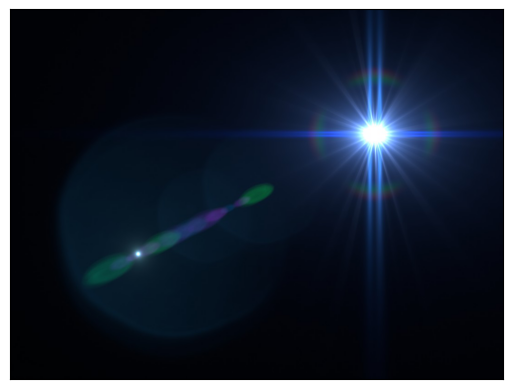

In [34]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


# Load the images
lf_only_path = "LF_on_black.jpg"
target_image_path = "LTV.png"
blender_composite_path = "LF_on_LTV_by_Blender.jpg"

# Open the images
lf_only = Image.open(lf_only_path)
target_image = Image.open(target_image_path)
blender_composite = Image.open(blender_composite_path)

plt.imshow(lf_only)
plt.xticks([]);plt.yticks([])
plt.show()

This LF only image should be applied on the target image below:

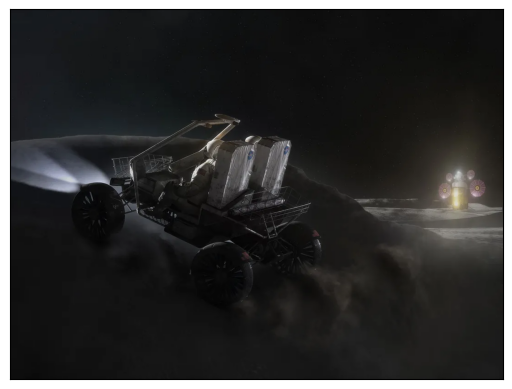

In [35]:
plt.imshow(target_image)
plt.xticks([]);plt.yticks([])
plt.show()

Below is the image composition by Blender.  We try to make our composition as close to this as possible.

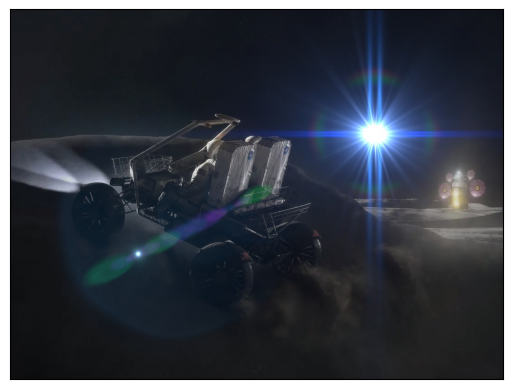

In [36]:
plt.imshow(blender_composite)
plt.xticks([]);plt.yticks([])
plt.show()

# Trying the Blender save with alpha

Unfortunately Blender saves the `LF_on_transparent_alpha.png` with an alpha channel opaque (255) even though the original background `transparent_image.png` was completely transparent.  After compositing the result has only the lens flares.

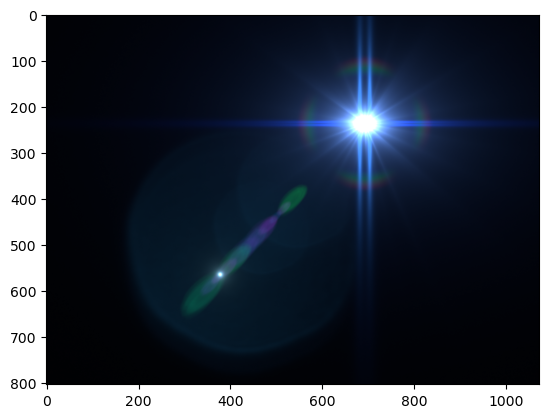

In [37]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


# Load the images
target_image_path = "LTV.png"
overlay_image_path = "LF_on_opaque_alpha.png"

# Open the images
target_image = Image.open(target_image_path)
overlay_image = Image.open(overlay_image_path)

# Ensure overlay image has an alpha channel
if overlay_image.mode != 'RGBA':
    overlay_image = overlay_image.convert('RGBA')

# Perform alpha compositing
composite_image = Image.alpha_composite(target_image.convert('RGBA'), overlay_image)

# Save the composite image
composite_image_path = "alpha_composited_image.png"
composite_image.save(composite_image_path)

plt.imshow(composite_image)
plt.show()


## Trying Film Transparent

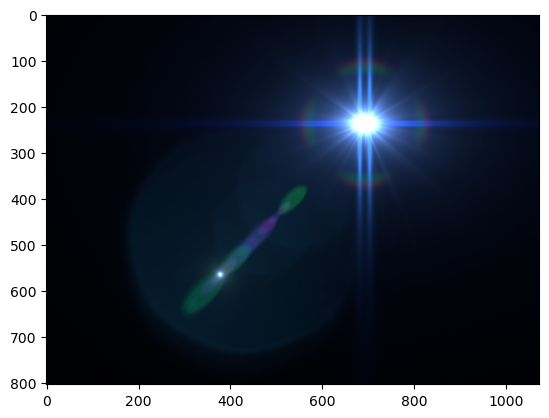

In [38]:
# Load the images
target_image_path = "LTV.png"
overlay_image_path = "LF_film_tranparent.png"

# Open the images
target_image = Image.open(target_image_path)
overlay_image = Image.open(overlay_image_path)

# Ensure overlay image has an alpha channel
if overlay_image.mode != 'RGBA':
    overlay_image = overlay_image.convert('RGBA')

# Perform alpha compositing
composite_image = Image.alpha_composite(target_image.convert('RGBA'), overlay_image)

# Save the composite image
composite_image_path = "film_tranparent_alpha_composited_image.png"
composite_image.save(composite_image_path)

plt.imshow(composite_image)
plt.show()


If we remove the background plane, Blender will render and image with totally transparent alpha (alpha=0), but when combining this with the target image, then the LF effect won't be visible, the result will contain only the target image.

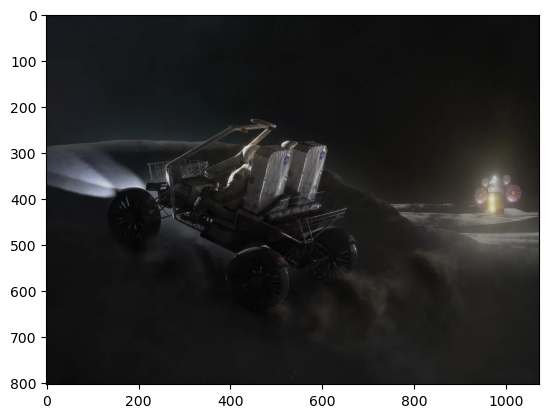

In [39]:
# Load the images
target_image_path = "LTV.png"
overlay_image_path = "LF_film_tranparent_wo_bg.png"

# Open the images
target_image = Image.open(target_image_path)
overlay_image = Image.open(overlay_image_path)

# Ensure overlay image has an alpha channel
if overlay_image.mode != 'RGBA':
    overlay_image = overlay_image.convert('RGBA')

# Perform alpha compositing
composite_image = Image.alpha_composite(target_image.convert('RGBA'), overlay_image)

# Save the composite image
composite_image_path = "film_tranparent_wo_bg_alpha_composited_image.png"
composite_image.save(composite_image_path)

plt.imshow(composite_image)
plt.show()


Replacing the opaque alpha with transparent alpha

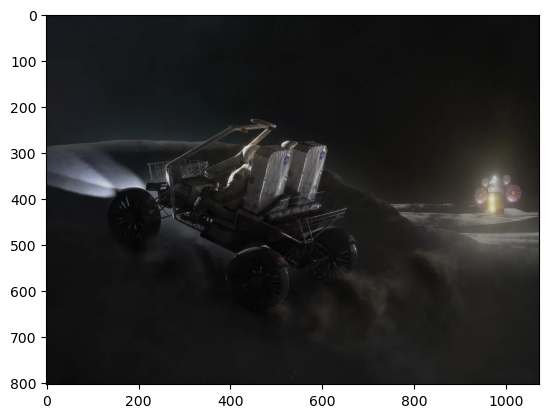

In [40]:
# Set the alpha channel to 0 for transparency
transparent_alpha = Image.new('L', overlay_image.size, 0)

# Put the transparent alpha channel back into the overlay image
overlay_image.putalpha(transparent_alpha)

# Now, let's attempt the alpha compositing again
composite_image_fix = Image.alpha_composite(target_image.convert('RGBA'), overlay_image)

# Save the new composite image
composite_image_fix_path = "alpha_composited_image_fix.png"
composite_image_fix.save(composite_image_fix_path)

plt.imshow(composite_image_fix)
plt.show()


If we make the alpha channel completely transparent, then unfortunately the lens flares are transparent as well.

Let's try semi-transparent

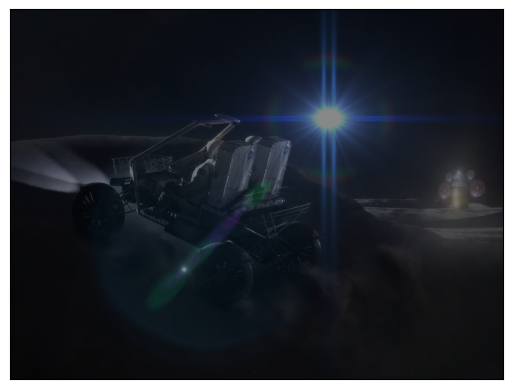

In [41]:
# Set the alpha channel to 128 for semi-transparency
semi_transparent_alpha = Image.new('L', overlay_image.size, 128)

# Put the semi-transparent alpha channel back into the overlay image
overlay_image.putalpha(semi_transparent_alpha)

# Now, let's attempt the alpha compositing again
composite_image_semi_transparent = Image.alpha_composite(target_image.convert('RGBA'), overlay_image)

# Save the new composite image
composite_image_semi_transparent_path = "composite_image_semi_transparent_path.png"
composite_image_semi_transparent.save(composite_image_semi_transparent_path)

plt.imshow(composite_image_semi_transparent)
plt.xticks([]);plt.yticks([])
plt.show()

This is dark.

# More Experiments


LF generated by Blender on black background.  

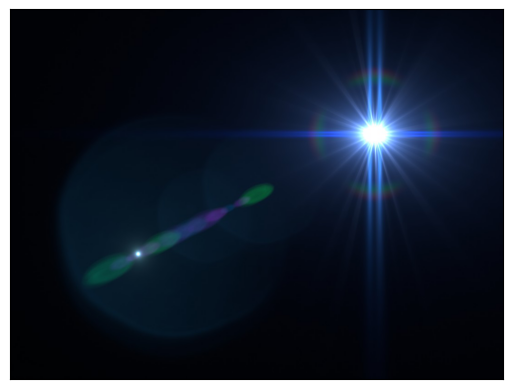

In [42]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'LF_on_black.jpg'
img = Image.open(image_path)

# Display the image with matplotlib
plt.imshow(img)
#plt.axis('off')  # Hide the axes
plt.xticks([]);plt.yticks([])
plt.show()

Adding alpha channel.  Transparency corresponds to the pixel intensity.

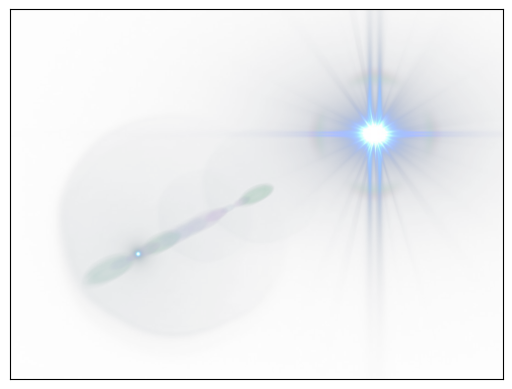

In [43]:
# Convert the image to RGBA if it's not already in that mode
if img.mode != 'RGBA':
    img = img.convert('RGBA')

# Separate the channels and get the intensity as the new alpha channel
r, g, b, _ = img.split()
intensity = Image.merge("RGB", (r, g, b)).convert("L")

# Combine the channels with the new alpha channel
img_with_alpha = Image.merge("RGBA", (r, g, b, intensity))

# Save the new image with alpha channel
output_path = 'LF_on_black_alpha.png'
img_with_alpha.save(output_path)

# Display the image with matplotlib
plt.imshow(img_with_alpha)
#plt.axis('off')  # Hide the axes
plt.xticks([]);plt.yticks([])
plt.show()

Load target image

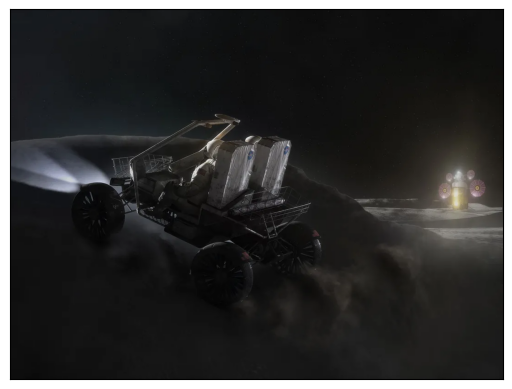

In [44]:
# Load the target image where we will apply the alpha channel image
target_image_path = 'LTV.png'
target_img = Image.open(target_image_path)


plt.imshow(target_img)
plt.xticks([]);plt.yticks([])
plt.show()



Paste the alpha channel lens flare image on top of the target image using the alpha channel as maks

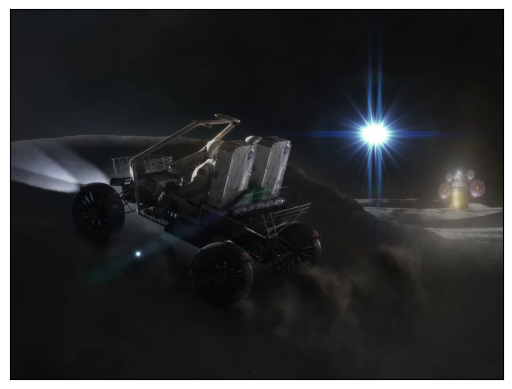

In [45]:
# Load the previously saved image with the alpha channel
alpha_image_path = 'LF_on_black_alpha.png'
alpha_img = Image.open(alpha_image_path)

# Ensure the alpha image is not larger than the target image
if alpha_img.size != target_img.size:
    alpha_img = alpha_img.resize(target_img.size, Image.ANTIALIAS)

# Paste the alpha image onto the target image using the alpha channel as a mask
target_img.paste(alpha_img, (0, 0), alpha_img)



# Save the combined image
combined_image_path = 'combined_image.png'
target_img.save(combined_image_path)


plt.imshow(target_img)
plt.xticks([]);plt.yticks([])
plt.show()


Result not perfect.  Trying another alpha composite.

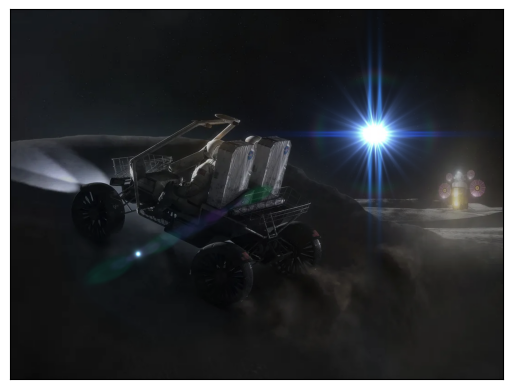

In [46]:
# another method
background_image = target_img.convert("RGBA")
composite_img = Image.alpha_composite(background_image, alpha_img)


# Save the combined image
composite_image_path = 'composite_image.png'
composite_img.save(composite_image_path)


plt.imshow(composite_img)
plt.xticks([]);plt.yticks([])
plt.show()


Looks similar to previous, but the `LF_on_LTV_by_Blender.jpg` made by Blender is somewhat better.

Let's try simply summing up the pixels of the target image + the original LF on black.


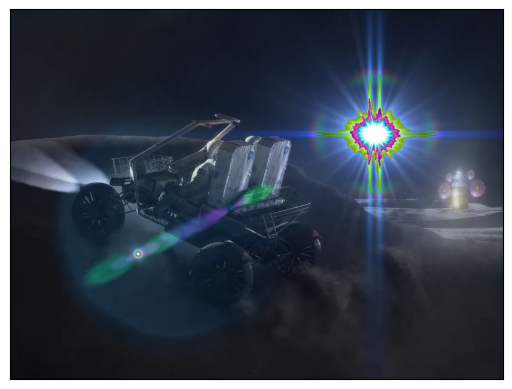

In [47]:
# Load the original black background image without alpha channel
original_img = Image.open('LF_on_black.jpg').convert("RGB")

# Ensure the images are the same size before adding them together
if original_img.size != target_img.size:
    original_img = original_img.resize(target_img.size, Image.ANTIALIAS)

# Convert images to numpy arrays for pixel-wise addition
original_array = np.array(original_img)
target_array = np.array(target_img.convert("RGB"))

# Perform pixel-wise addition using numpy, ensuring values stay within [0,255]
summed_array = np.clip(original_array + target_array, 0, 255).astype('uint8')

# Convert the summed array back into an image
summed_img = Image.fromarray(summed_array)

# Save the summed image
summed_image_path = 'summed_image.png'
summed_img.save(summed_image_path)


plt.imshow(summed_img)
plt.xticks([]);plt.yticks([])
plt.show()



Ok, this has new colors.  Let's try another method, keeping max pixel value, thus preserving colors.

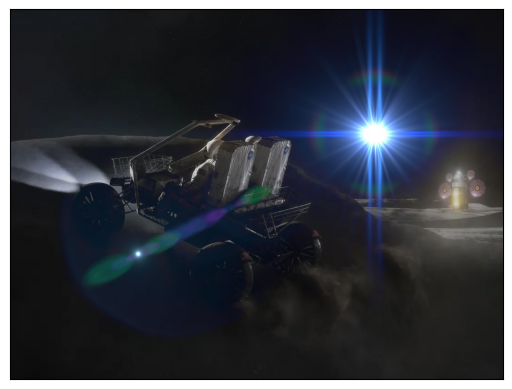

In [48]:
# To preserve the original colors from both images, we need to perform the addition
# to not create new colors outside the original color spaces of the two images.
# This can be done by taking the maximum value of the two images at each pixel.

# Perform pixel-wise maximum operation using numpy to preserve original colors
maxed_array = np.maximum(original_array, target_array)

# Convert the maxed array back into an image
maxed_img = Image.fromarray(maxed_array)

# Save the maxed image
maxed_image_path = 'maxed_image.jpg'
maxed_img.save(maxed_image_path)

plt.imshow(maxed_img)
plt.xticks([]);plt.yticks([])
plt.show()


This looks like the one produced by Blender.  

q.e.d.